# Importing Dependencies

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Data Loading

In [218]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_for_ML_Projects/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [219]:
print(df.shape)

(7043, 21)


In [220]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [221]:
pd.set_option("display.max_columns", None) # to show all columns using pd.head()

In [222]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [224]:
df.drop(columns=["customerID"],inplace=True)

In [225]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [226]:
numerical_features_set = {"tenure","MonthlyCharges","TotalCharges"}
for col in df.columns:
  if col not in numerical_features_set:
    print(col, df[col].unique())
    print(col, df[col].unique())

gender ['Female' 'Male']
gender ['Female' 'Male']
SeniorCitizen [0 1]
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']


In [227]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [228]:
try:
  df["TotalCharges"] = df["TotalCharges"].astype(float)
  print("Success")
except:
  print("Error")

Error


There is some string values which are not null but not float

In [229]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [230]:
len(df[df["TotalCharges"]==" "])

11

In [231]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0.0")

In [232]:
try:
  df["TotalCharges"] = df["TotalCharges"].astype(float)
  print("Success")
except:
  print("Error")

Success


In [233]:
len(df[df["TotalCharges"]==" "])

0

In [234]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Class imbalancing in target column.

# E.D.A

In [235]:
df.shape

(7043, 20)

In [236]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [237]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [238]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Understanding distribution of Numerical features

## Hist Plot

In [239]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Histogram of {column_name}")
  plt.xlabel(column_name)

  # calculate mean and median
  mean = df[column_name].mean()
  median = df[column_name].median()

  # add mean and median to the plot
  plt.axvline(mean, color="red", linestyle="dashed", linewidth=1, label="mean")
  plt.axvline(median, color="green", linestyle="dashed", linewidth=1, label="median")

  plt.legend()
  plt.show()

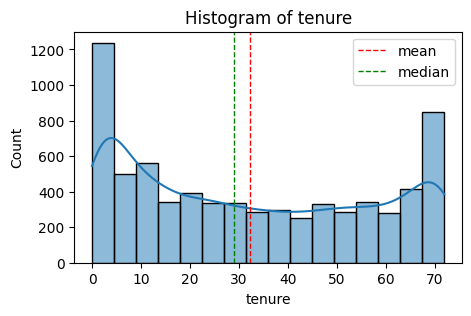

In [240]:
plot_histogram(df, "tenure")

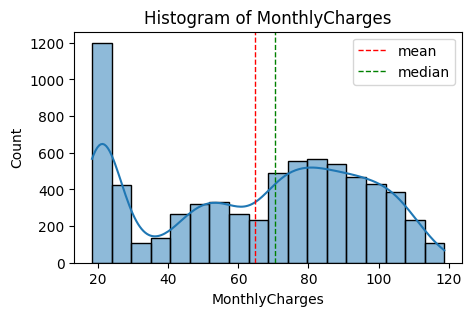

In [241]:
plot_histogram(df, "MonthlyCharges")

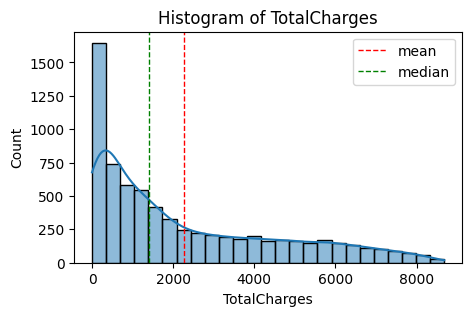

In [242]:
plot_histogram(df, "TotalCharges")

## Box Plot

In [243]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.xlabel(column_name)
  plt.show()

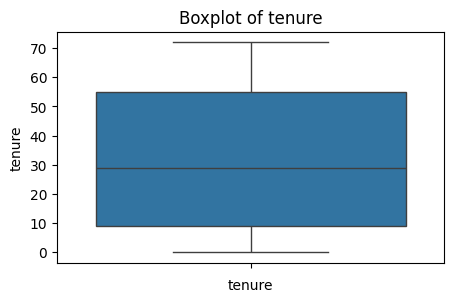

In [244]:
plot_boxplot(df, "tenure")

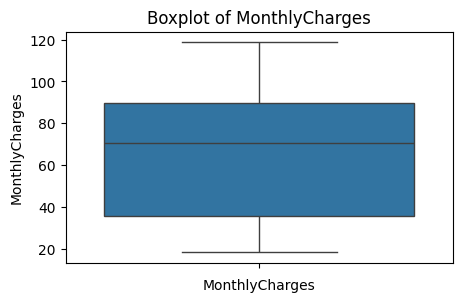

In [245]:
plot_boxplot(df, "MonthlyCharges")

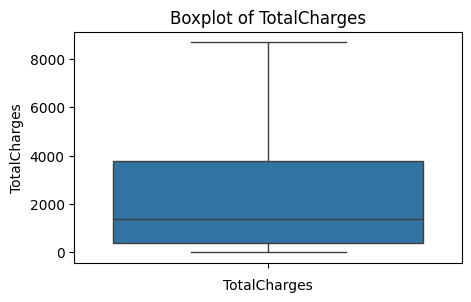

In [246]:
plot_boxplot(df, "TotalCharges")

There are no outliers in dataset we can see from box plot

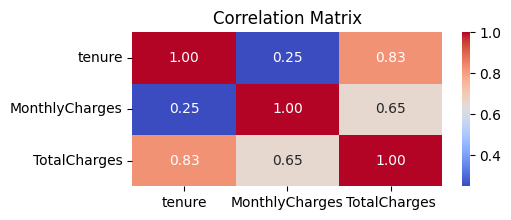

In [247]:
# correlation matrix - heatmap
plt.figure(figsize=(5,2))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Categorical Features Analysis

In [248]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [250]:
# object columns -> column with data type = object
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols += ['SeniorCitizen'] # adding because this is also categorical but was not object
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

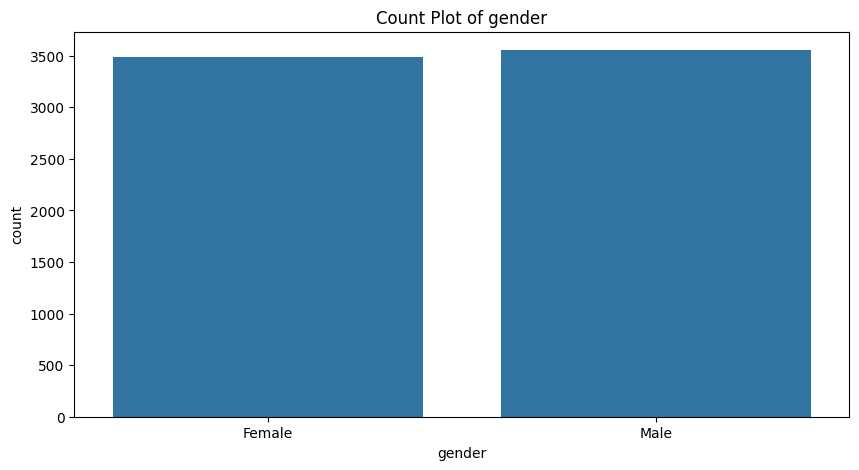

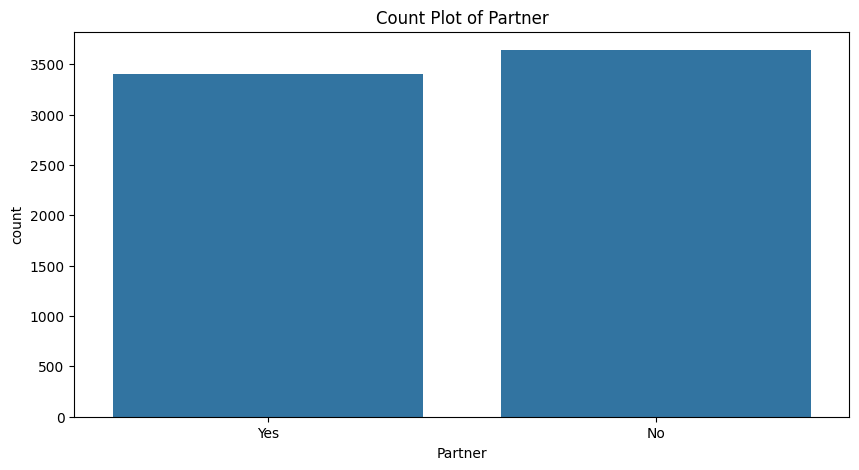

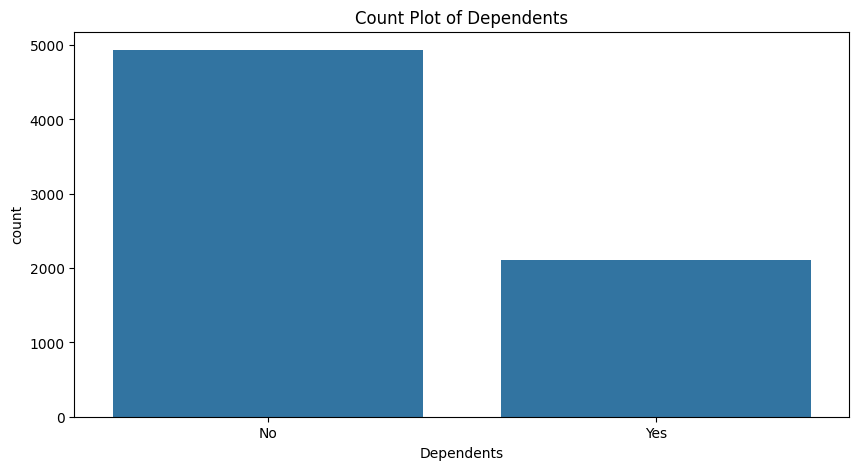

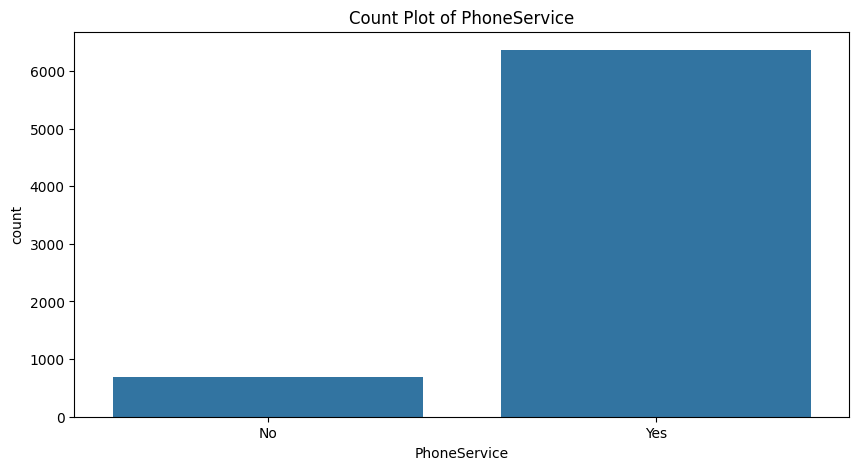

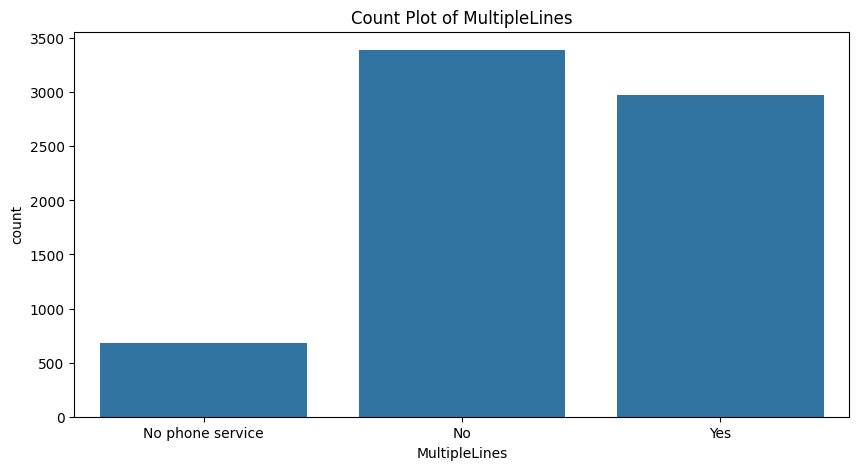

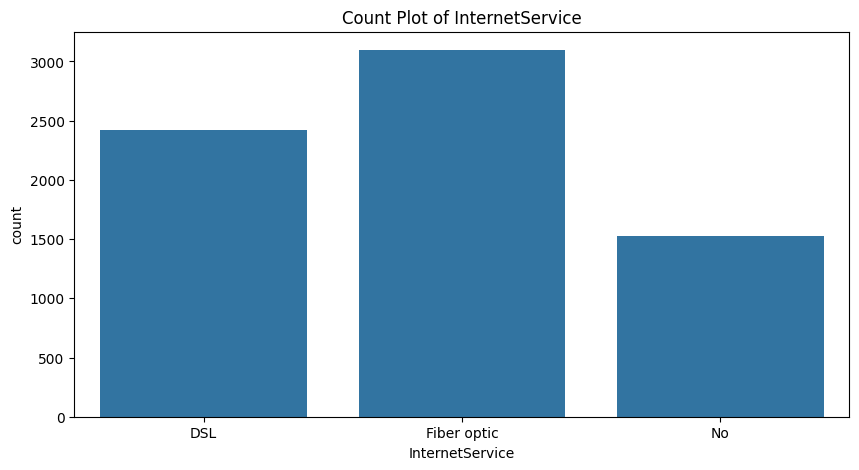

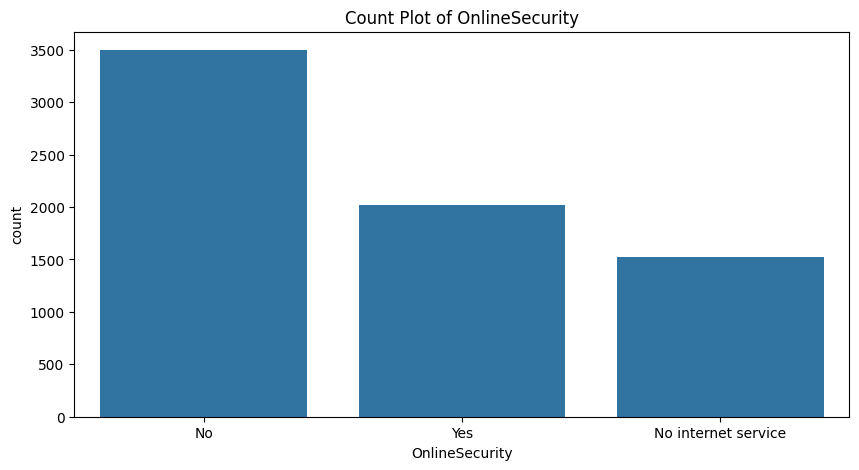

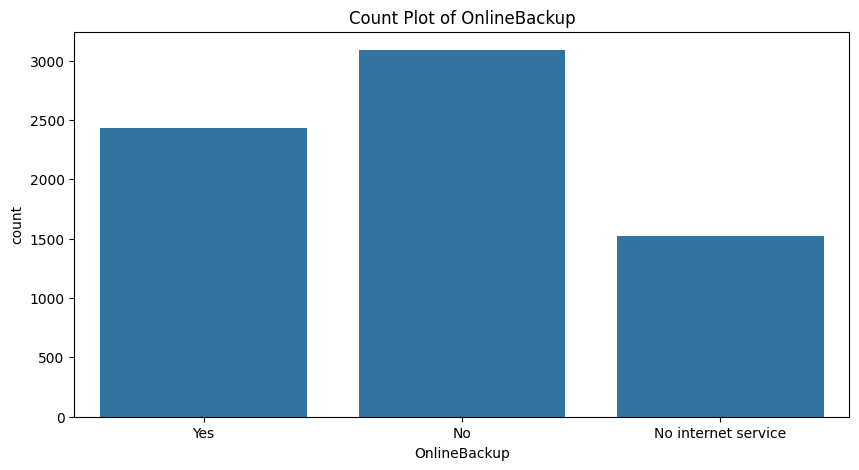

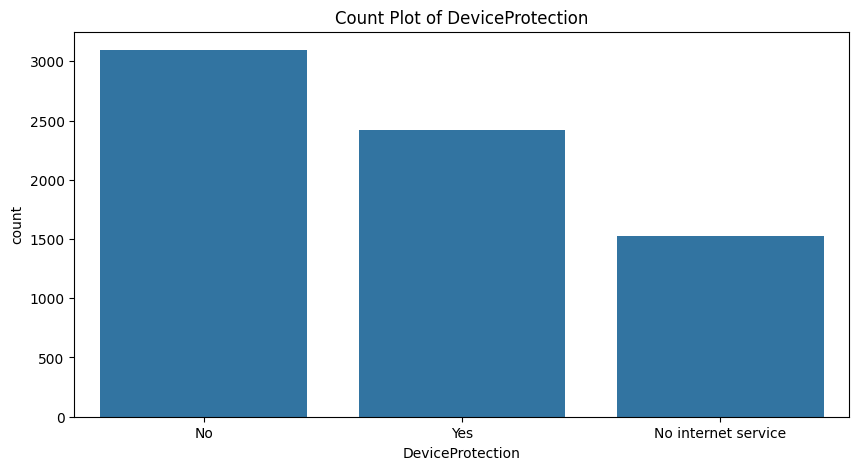

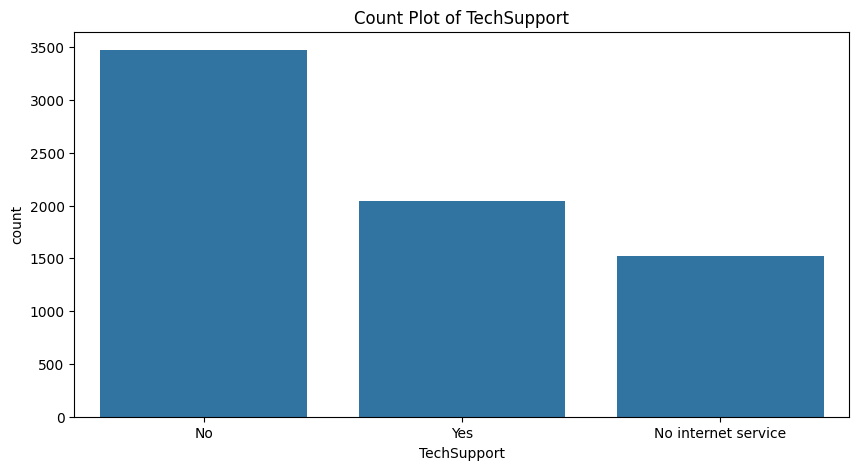

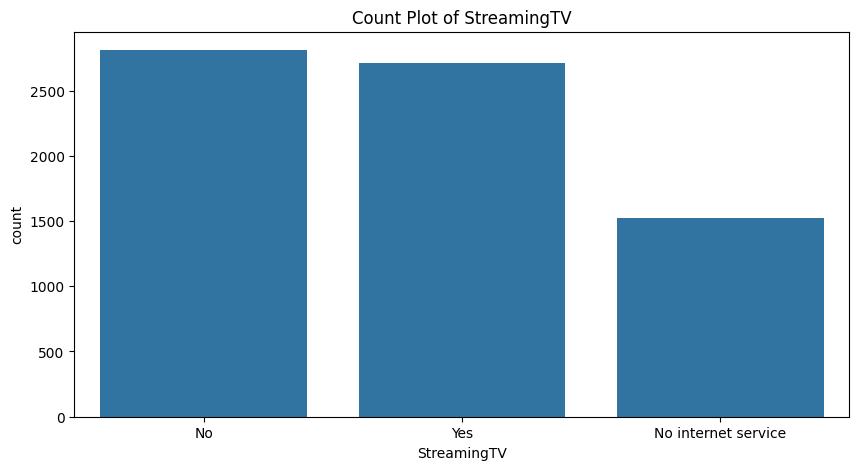

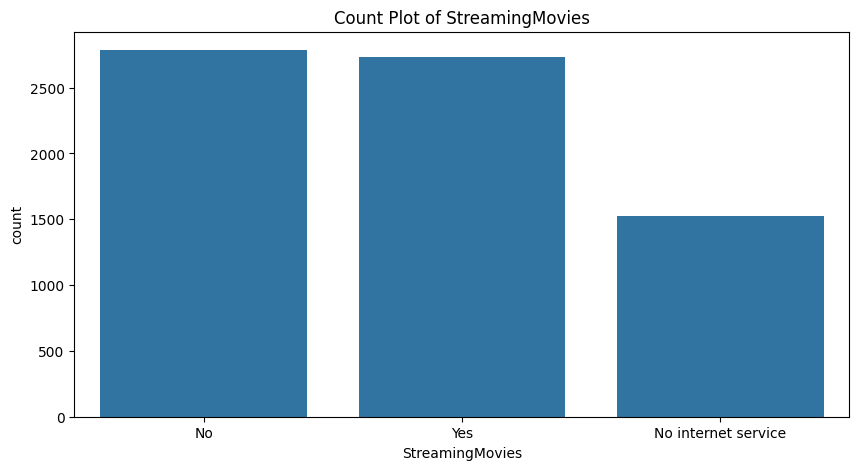

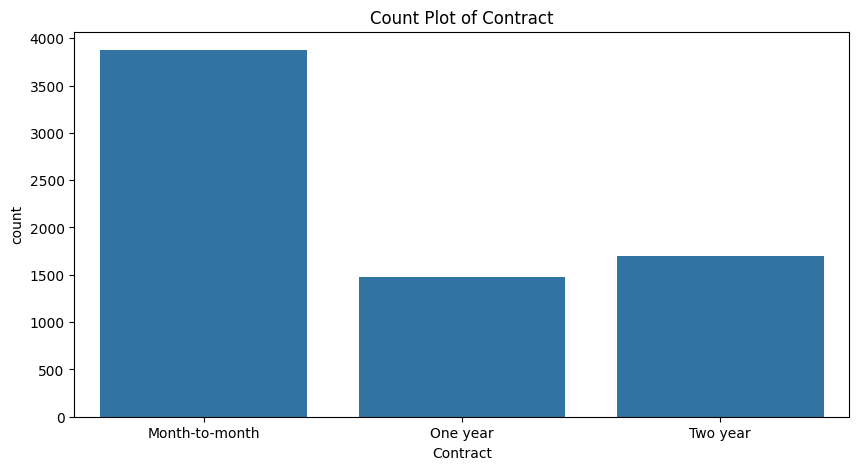

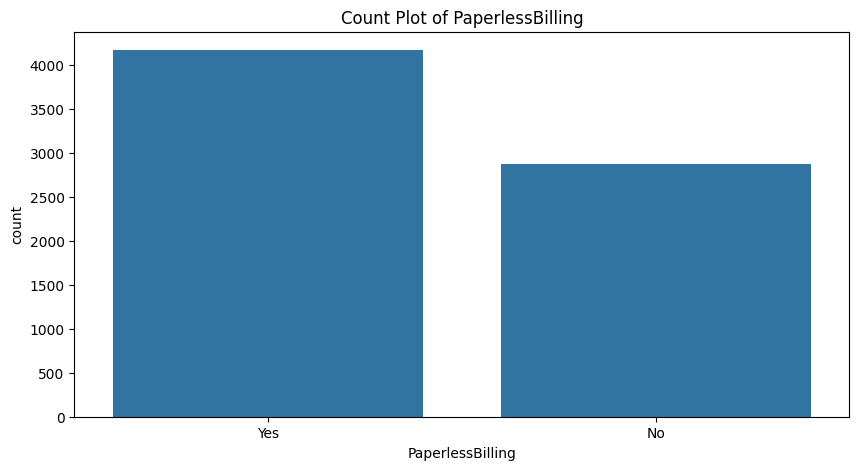

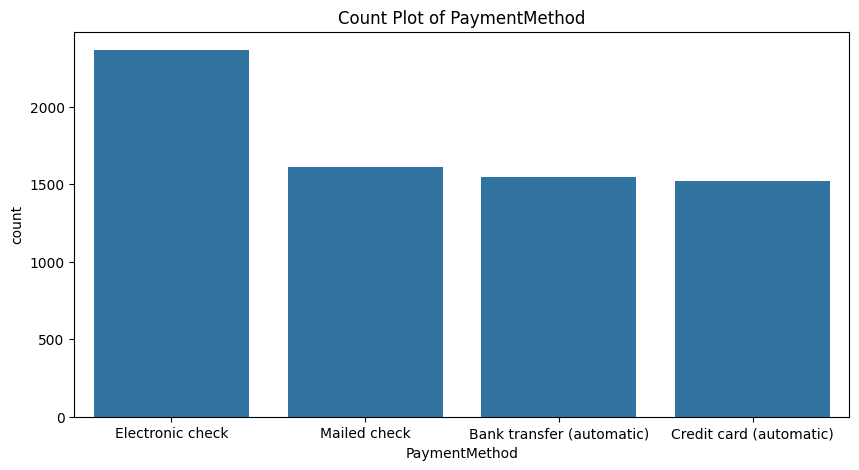

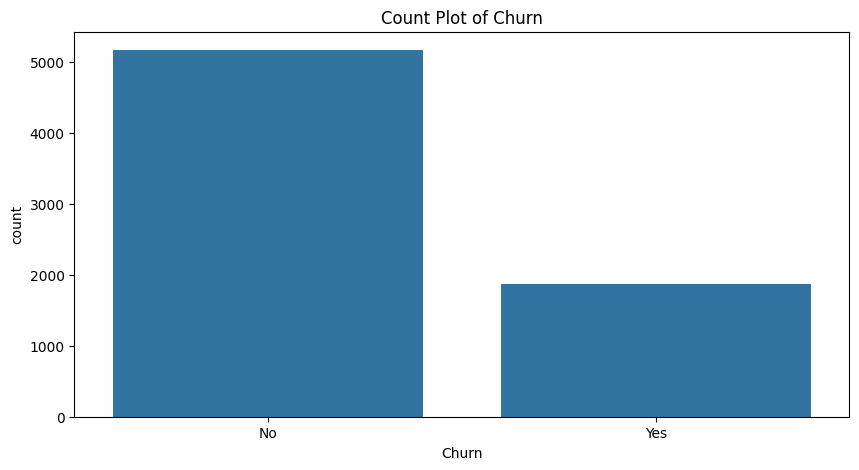

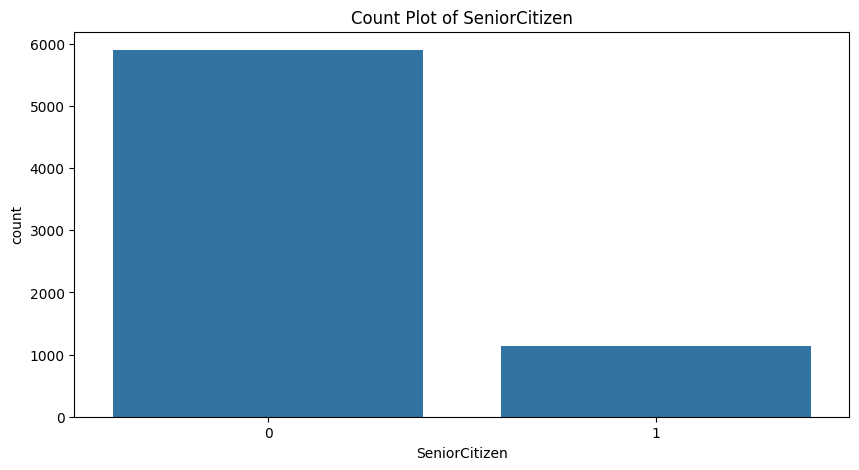

In [251]:
for col in object_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.xlabel(col)
  plt.show()

# Data Preprocessing

In [252]:
encoders = {}

# apply label encoding and save the encoders
for col in object_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le

# save encoders to pickle
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [253]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Train test split

In [254]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [255]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
y_train.shape

(5634,)

In [257]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


Imbalanced data

# Synthetic Minority Oversampling Technique (SMOTE)

In [258]:
smote = SMOTE()

In [259]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [260]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(8276, 19)
(8276,)


In [261]:
# Dictionary of Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBRFClassifier(random_state=42)
}

In [262]:
# dictionary to store cross validation scores
cv_scores = {}

for model_name, model in models.items():
  cv_score = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
  cv_scores[model_name] = cv_score
  print(f"{model_name} CV Score: {cv_score.mean()}")

Decision Tree CV Score: 0.781548593779646
Random Forest CV Score: 0.837736328210517
XGBoost CV Score: 0.8095799582585345


In [263]:
cv_scores

{'Decision Tree': array([0.68538647, 0.7244713 , 0.83806647, 0.82356495, 0.83625378]),
 'Random Forest': array([0.73188406, 0.76555891, 0.89848943, 0.8918429 , 0.90090634]),
 'XGBoost': array([0.72584541, 0.76495468, 0.86163142, 0.83383686, 0.86163142])}

Random Forest giving highest accuracy

In [264]:
rfc = RandomForestClassifier(random_state=42)

In [265]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [266]:
y_test_pred = rfc.predict(X_test)

In [267]:
print("Accuracy Score :", accuracy_score(y_test, y_test_pred))

Accuracy Score : 0.7750177430801988


In [268]:
print("Confusion Matrix :","\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix : 
 [[879 157]
 [160 213]]


In [269]:
print("Classification Report :","\n", classification_report(y_test, y_test_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [270]:
# Save model in pickle file

model_data = {"model_name":rfc, "features_names":X.columns.to_list()}

with open('model.pkl', 'wb') as f:
  pickle.dump(model_data, f)

In [271]:
# Load the Saved Model and build a predictive system

with open('model.pkl', 'rb') as f:
  model_data = pickle.load(f)

with open('encoders.pkl', 'rb') as f:
  encoders = pickle.load(f)

loaded_model = model_data["model_name"]
features_names = model_data["features_names"]

In [272]:
print(loaded_model)
print(features_names)

RandomForestClassifier(random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [273]:
print(encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder(), 'Churn': LabelEncoder(), 'SeniorCitizen': LabelEncoder()}


In [282]:
# test example
# correct prediction is No
example = ['Female',	'0',	'Yes',	'No',	'1',	'No',	'No phone service',	'DSL',	'No',	'Yes',	'No',	'No',	'No',	'No',	'Month-to-month',	'Yes',	'Electronic check',	'29.85',	'29.85']
len(example)

19

In [275]:
input_data_df = pd.DataFrame([example], columns=features_names)

In [276]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [277]:
# encode categorical features using the saved encoders
for col, encoder in encoders.items():
  if col == "Churn":
    continue
  input_data_df[col] = encoder.transform(input_data_df[col])

In [278]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [279]:
prediction = loaded_model.predict(input_data_df)

In [280]:
print(prediction)

[0]


In [281]:
if prediction[0] == 0:
  print("Customer will not churn")
else:
  print("Customer will churn")

Customer will not churn


In [283]:
prediction_prob = loaded_model.predict_proba(input_data_df)

In [284]:
print(prediction_prob)

[[0.82 0.18]]
